In [134]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [135]:
bos.shape

(506, 13)

In [136]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [137]:
bos.columns = boston.feature_names
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [138]:
bos['MEDV'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


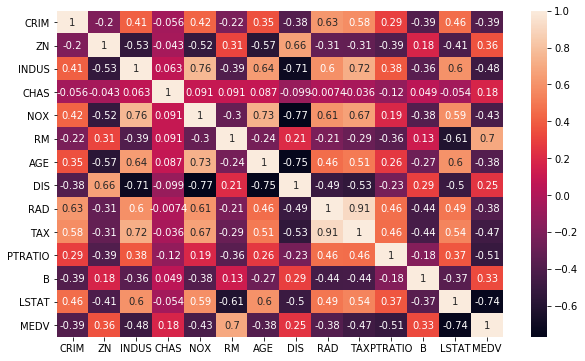

In [139]:
plt.figure(figsize = (10,6))
corr_m = bos.corr()
sns.heatmap(corr_m,annot=True)

visualising the relationship of target MEDV with RM and LSTAT

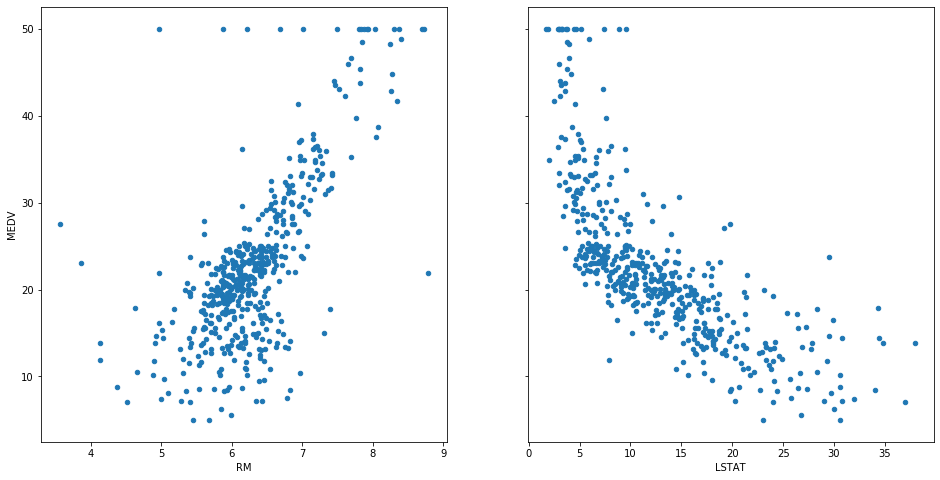

In [140]:
fig, axs = plt.subplots(1, 2, sharey=True)
bos.plot(kind='scatter', x='RM', y='MEDV', ax=axs[0], figsize=(16, 8))
bos.plot(kind='scatter', x='LSTAT', y='MEDV', ax=axs[1])

From both graphs, it is clear that for RM-MEDV is directly proportitonal and the graph LSTAT-MEDV is inversely proportional with a slight curve shape.

In [141]:
feature_col = ["LSTAT",'RM']
X = bos[feature_col]
y = bos['MEDV']

In [142]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 350)


In [143]:
X_train.shape

(404, 2)

In [144]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
print(lm.coef_)

-0.4323653365661073
[-0.62005881  4.88421739]


In [145]:
train_res = lm.predict(X_train)
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



rmse = np.sqrt(mean_squared_error(y_train,train_res))
r2 = r2_score(y_train,train_res)
print('the performance of the model for training set"\n RMSE:{} \n r2 score:{}'.format(rmse,r2))

the performance of the model for training set"
 RMSE:5.406563246552245 
 r2 score:0.6252209045018247


In [146]:
test_res = lm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,test_res))
r2 = r2_score(y_test,test_res)
print('the performance of the model for training set"\n RMSE:{} \n r2 score:{}'.format(rmse,r2))

the performance of the model for training set"
 RMSE:6.002619598535506 
 r2 score:0.6698021614365899


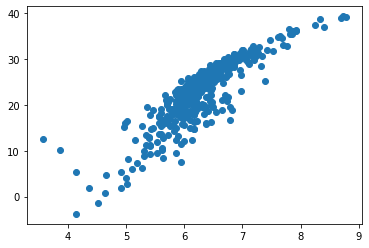

In [147]:
plt.scatter(x= X_train['RM'],y = lm.predict(X_train))

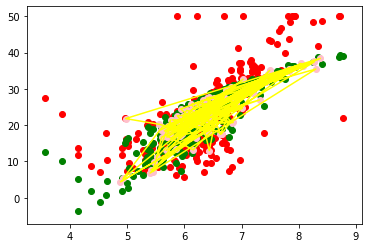

In [152]:
plt.scatter(X_train['RM'],y_train,color = 'red')
plt.scatter(X_train['RM'],train_res,color = 'green')
plt.scatter(X_test['RM'],test_res,color = 'pink')
plt.plot(X_test['RM'],test_res,color = 'yellow')
